In [1]:
pip install requests-cache

In [12]:
# Imports

import requests
import pandas as pd
from lxml import html
import seaborn as sns

pd.set_option('display.min_rows', 50)

page = 1
url = f"https://www.imdb.com/search/title/?groups=top_250&sort=user_rating,desc&start={page}&ref_=adv_prv"
reponse = requests.get(url)

tree = html.fromstring(reponse.content)



In [6]:
url = f"https://www.imdb.com/search/title/?groups=top_250&sort=user_rating,desc&start={page}&ref_=adv_prv"
reponse = requests.get(url)
tree = html.fromstring(reponse.content)
films_titre = tree.xpath('//h3[@class="lister-item-header"]/a/text()')
films_duree = tree.xpath('//span[@class="runtime"]/text()')
films_annee = tree.xpath('//span[@class="lister-item-year text-muted unbold"]/text()')
films_stars = tree.xpath('//div[@class="inline-block ratings-imdb-rating"]/strong/text()')
films_votes = tree.xpath('//p[@class="sort-num_votes-visible"]/span[2]/@data-value')
films_real = tree.xpath('//div[@class="lister-item-content"]/p[@class=""]/a[1]/text()')

# récupération de la liste votes+gross
bloc = tree.xpath('//p[@class="sort-num_votes-visible"]/span/text()')
# transformation de la liste en string
str_bloc = "".join(bloc)

# transformation en liste couper à l'occurence "Votes:" et suppression de la 1ère string vide
films_recettes = str_bloc.split("Votes:")
films_recettes.remove(films_recettes[0])
# nettoyage de la liste pour
for i in range(len(films_recettes)):
    if "Gross" in films_recettes[i]:
        j=films_recettes[i].index('$')+1
        films_recettes[i]=films_recettes[i][j:-1]
    else:
        films_recettes[i] = films_recettes[i] + '|Gross:$0M'
        j=films_recettes[i].index('$')+1
        films_recettes[i]=films_recettes[i][j:-1]
        
df= pd.DataFrame(zip(films_titre, films_duree, films_annee, films_stars, films_votes, films_real, films_recettes), columns = ['Titre', 'Durée (en minutes)', 'Année', 'Stars', 'Nombre de votes', 'Réalisateur', 'Recettes (en dollars)'])
      
df

,Titre,Durée (en minutes),Année,Stars,Nombre de votes,Réalisateur,Recettes (en dollars)
0,Les Évadés,142 min,(1994),9.3,2386856,Frank Darabont,28.34
1,Le parrain,175 min,(1972),9.2,1654262,Francis Ford Coppola,134.97
2,The Dark Knight : Le Chevalier noir,152 min,(2008),9.0,2349941,Christopher Nolan,534.86
3,"Le parrain, 2ème partie",202 min,(1974),9.0,1150714,Francis Ford Coppola,57.30
4,12 Hommes en colère,96 min,(1957),9.0,704594,Sidney Lumet,4.36
5,Le Seigneur des anneaux : Le Retour du roi,201 min,(2003),8.9,1669293,Peter Jackson,377.85
6,Pulp Fiction,154 min,(1994),8.9,1858808,Quentin Tarantino,107.93
7,La liste de Schindler,195 min,(1993),8.9,1233900,Steven Spielberg,96.90
8,Inception,148 min,(2010),8.8,2108353,Christopher Nolan,292.58
9,Fight Club,139 min,(1999),8.8,1888088,David Fincher,37.03


In [7]:



df['Durée (en minutes)'] = df['Durée (en minutes)'].map(lambda x: x.rstrip(' min'))
df['Durée (en minutes)'] = pd.to_numeric(df['Durée (en minutes)'])

df['Année'] = df['Année'].map(lambda x: x.lstrip('(').rstrip(')'))
df['Année'] = pd.to_numeric(df['Année'])

df['Nombre de votes'] = df['Nombre de votes'].map(lambda x: x.rstrip(' '))
df['Nombre de votes'] = pd.to_numeric(df['Nombre de votes'])

df['Stars'] = df['Stars'].astype(float)

df['Recettes (en dollars)'] = df['Recettes (en dollars)'].astype(float)



df

,Titre,Durée (en minutes),Année,Stars,Nombre de votes,Réalisateur,Recettes (en dollars)
0,Les Évadés,142,1994,9.3,2386856,Frank Darabont,28.34
1,Le parrain,175,1972,9.2,1654262,Francis Ford Coppola,134.97
2,The Dark Knight : Le Chevalier noir,152,2008,9.0,2349941,Christopher Nolan,534.86
3,"Le parrain, 2ème partie",202,1974,9.0,1150714,Francis Ford Coppola,57.30
4,12 Hommes en colère,96,1957,9.0,704594,Sidney Lumet,4.36
5,Le Seigneur des anneaux : Le Retour du roi,201,2003,8.9,1669293,Peter Jackson,377.85
6,Pulp Fiction,154,1994,8.9,1858808,Quentin Tarantino,107.93
7,La liste de Schindler,195,1993,8.9,1233900,Steven Spielberg,96.90
8,Inception,148,2010,8.8,2108353,Christopher Nolan,292.58
9,Fight Club,139,1999,8.8,1888088,David Fincher,37.03


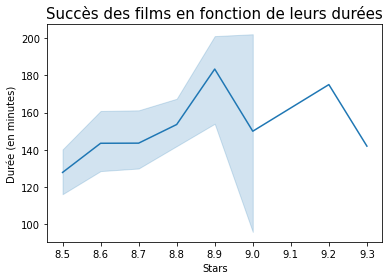

In [13]:
temps_rating = sns.lineplot(data=df,y='Durée (en minutes)',x='Stars').set_title('Succès des films en fonction de leurs durées', size='15');